In [1]:
import pandas as pd
import numpy as np

#### prepare the tables for plotting a roc curve

In [2]:
# open all diseases concept id vs disease ids
dz_con = pd.read_csv('C:/Users/Saba/Desktop/Tutored research project/DrugRepurposing/data/results/ancestors_offsprings.csv', sep=',', header=0, index_col=0)
dz_con= dz_con[['dz_id', 'concept', 'type']]
dz_con= dz_con.reset_index(drop=True)
dz_con

,dz_id,concept,type
0,dz:328,C0013264,self
1,dz:328,C0026848,ancestor
2,dz:328,C0026850,ancestor
3,dz:328,C0012634,ancestor
4,dz:328,C0026857,ancestor
...,...,...,...
17564,dz:655,C0861352,offspring
17565,dz:655,C0154092,offspring
17566,dz:655,C0851140,offspring
17567,dz:655,C0154069,offspring


In [3]:
# filter self disease only
self_df = dz_con.loc[dz_con['type'] == 'self']
self_df = self_df.reset_index(drop=True)
self_df = self_df[['dz_id','concept']]
self_df

,dz_id,concept
0,dz:328,C0013264
1,dz:323,C0007193
2,dz:322,C0004623
3,dz:321,C0085786
4,dz:320,C0011860
...,...,...
1660,dz:849,C0014170
1661,dz:849,C0007103
1662,dz:651,C0699790
1663,dz:657,C0553723


In [4]:
# add indicator column to the table
self_df['Indicator']= 1
self_df

,dz_id,concept,Indicator
0,dz:328,C0013264,1
1,dz:323,C0007193,1
2,dz:322,C0004623,1
3,dz:321,C0085786,1
4,dz:320,C0011860,1
...,...,...,...
1660,dz:849,C0014170,1
1661,dz:849,C0007103,1
1662,dz:651,C0699790,1
1663,dz:657,C0553723,1


In [5]:
# reshape the table into a matrix 
self_df = pd.pivot_table(self_df, index='concept', columns='dz_id', values='Indicator')
self_df[self_df.isna()] = 0
self_df = self_df.astype(int)
self_df

dz_id,dz:1000,dz:1001,dz:1002,dz:1003,dz:1004,dz:1005,dz:1006,dz:101,dz:1011,dz:1012,...,dz:98,dz:981,dz:982,dz:983,dz:984,dz:985,dz:990,dz:991,dz:992,dz:993
concept,,,,,,,,,,,,,,,,,,,,,
C0001306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C0001339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C0001430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C0002395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C0002736,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1527168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1527336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1527349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# open the indication matrix
brd_conc = pd.read_csv('C:/Users/Saba/Desktop/Tutored research project/DrugRepurposing/data/results/brd_conc.csv', sep=',', header=0, index_col=0)
brd_conc

,C0000810,C0000814,C0001126,C0001127,C0001144,C0001206,C0001207,C0001261,C0001263,C0001264,...,C3897537,C3897731,C3898069,C3898092,C3898222,C3898877,C3900099,C4038730,C4048328,C4083212
BRD-ID,,,,,,,,,,,,,,,,,,,,,
BRD-A00100033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRD-A00546892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRD-A00758722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRD-A00827783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
BRD-A00993607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BRD-K99984802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRD-M47793593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRD-M98649031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# find the common concept Ids between the matrices
common_db = list(set(brd_conc.columns) & set(self_df.index))

In [8]:
# multiplying both matrices with the common diseases to get the common indication matrix
self_brd_dz = brd_conc[common_db] @ self_df.loc[common_db]

In [10]:
# correlation matrix (disease ID vs Broad ID)
similarity = pd.read_csv('C:/Users/Saba/Desktop/Tutored research project/DrugRepurposing/data/results/brd_dz_corr.csv', sep=',', header=0, index_col=0)
similarity

,dz-1000,dz-1001,dz-1002,dz-1003,dz-1004,dz-1005,dz-1011,dz-1012,dz-102,dz-1021,...,dz-979,dz-98,dz-980,dz-981,dz-982,dz-983,dz-984,dz-985,dz-990,dz-991
BRD-K06674495,0.066670,0.118966,0.125683,0.057989,0.122721,0.064734,-0.009684,0.101766,-0.007885,0.022460,...,0.019637,0.091178,0.072941,-0.065441,-0.072216,0.105552,0.029268,0.080375,0.068325,0.062684
BRD-K13005598,-0.013880,0.035840,0.013460,-0.027457,0.019176,-0.035669,0.032979,-0.043762,0.026163,0.033194,...,-0.047346,-0.025270,0.004441,-0.009225,-0.000506,0.008497,-0.015131,0.003364,-0.044631,-0.116571
BRD-K53414658,-0.025052,-0.031393,-0.073677,-0.064345,0.057462,-0.057956,0.037644,0.026204,0.011634,0.089243,...,-0.131232,-0.150644,-0.031836,-0.031777,-0.019102,-0.003967,-0.014603,0.026543,-0.026507,-0.056030
BRD-K09485525,0.067112,0.057495,-0.071661,-0.087242,-0.055037,-0.099037,-0.002947,0.108484,0.016799,-0.001486,...,-0.274513,0.056862,-0.039405,-0.126530,-0.148273,-0.128911,-0.022638,-0.066035,-0.174796,-0.190250
BRD-K02950022,0.016955,0.021994,0.029253,-0.051965,-0.010874,-0.026066,-0.028676,0.031235,0.006593,0.106154,...,-0.135260,0.018354,0.004145,-0.054970,-0.102150,-0.020334,0.002388,-0.061010,-0.080655,-0.099899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BRD-K06234293,-0.029219,-0.044929,-0.105232,-0.131461,-0.049543,-0.053180,-0.043853,0.006456,-0.047078,0.018269,...,0.047330,-0.103736,0.077848,0.039492,0.048736,0.103372,-0.113326,0.002839,-0.029638,-0.029233
BRD-K64925568,0.021497,0.022991,0.040036,-0.025479,-0.015981,-0.033822,0.007910,0.055046,-0.019045,0.074883,...,-0.374318,0.046411,-0.062879,-0.038719,-0.020123,-0.158803,0.026248,-0.018008,-0.140115,-0.298888
BRD-A13133631,-0.096410,-0.032140,0.041751,0.047089,0.085241,0.010350,0.022568,0.003022,0.016884,0.122504,...,-0.061172,-0.035743,-0.071672,-0.019662,0.039339,0.053417,0.092866,-0.001433,0.006978,0.038669
BRD-K84658672,0.056069,-0.012038,-0.076591,-0.114969,-0.035062,-0.066394,0.007560,0.039698,0.007977,-0.080815,...,-0.082534,-0.022123,-0.029680,-0.039606,-0.030218,-0.017106,0.009238,-0.008238,-0.054368,-0.081949


In [13]:
# adjust the column names
good_columns = []
for c in self_brd_dz.columns:
    good_columns.append(c.replace(':','-'))

In [15]:
self_brd_dz.columns = good_columns

#### adjust the matrices to be same dimensions with the common drug and disease IDs

In [16]:
# find the common drugs between the indication and correlation matrices
common_brd = list(set(self_brd_dz.index) & set(similarity.index))

In [17]:
# find the common diseases between the indication and the correlation matrices
common_dz = list(set(self_brd_dz.columns) & set(similarity.columns))

In [18]:
self_brd_dz =  self_brd_dz.loc[common_brd,common_dz]

In [19]:
similarity =  similarity.loc[common_brd,common_dz]

#### Create roc curve from the matrices with same dimensions

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [21]:
# equalize any value higher than 1 to 1
self_brd_dz[self_brd_dz>0] = 1

In [22]:
y_tr = self_brd_dz.values.reshape((1, -1))[0]
y_pr = similarity.values.reshape((1,-1))[0]

In [23]:
fpr, tpr, thr = roc_curve(y_true=y_tr, y_score=y_pr)

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

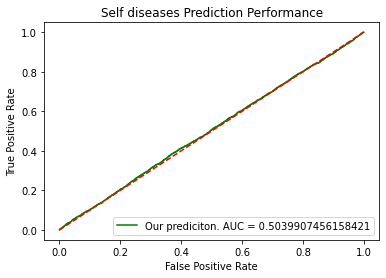

In [25]:
# plot the roc curve with the AUC score
auc = roc_auc_score(y_true=y_tr, y_score=y_pr)
plt.plot(fpr, tpr, label ="Our prediciton. AUC = %s" %auc, color = "green" )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Self diseases Prediction Performance")
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], linestyle = "--", color = "red")
plt.show()